# SQL

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing packages from mysql connector

import mysql.connector
from mysql.connector import Error

In [3]:
#Establish a db connection with python using a try except functionality to handle exceptions

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='houses',
                                         user='root',
                                         password='@1Figosood')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.0.30
You're connected to database:  ('houses',)


In [5]:
#defining a function to pass arguements for the image id and the filename in which the blob data needs to be saved and
#fetching the blob image saved in the data set as a structured image file with inclusion of exception handling

def read_blob(image_id, filename):
    # select photo of a particular house
    query = "SELECT image FROM pictures WHERE image_id = 1"
    
    try:
        # query blob data from pictures table
        cursor.execute(query, (image_id,))
        photo = cursor.fetchone()[0]

        # write blob data into a file 
        write_file(photo, filename)
        
    except Error as e:
        print(e)

    finally:
        cursor.close()
        #connection.close()

In [7]:
#Loading of structured data (census) into a dataframe for analysis

import pandas as pd

query1 = "SELECT *  FROM census;"
df = pd.read_sql(query1, connection)

/Users/adityasood/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [8]:
print(df.head())

   Zip_Code  Total_Population  Median_Age  Total_Males  Total_Females  \
0     91371                 1        73.5            0              1   
1     90001             57110        26.6        28468          28642   
2     90002             51223        25.5        24876          26347   
3     90003             66266        26.3        32631          33635   
4     90004             62180        34.8        31302          30878   

   Total_Households  Average_Household_Size  
0                 1                    1.00  
1             12971                    4.40  
2             11731                    4.36  
3             15642                    4.22  
4             22547                    2.73  


In [9]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [10]:
#importing numpy for analysis

import numpy as np

In [11]:
#repremting dataframe as matrix

X = df.iloc[:, 3:13].values
print(X)

[[0.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [2.8468e+04 2.8642e+04 1.2971e+04 4.4000e+00]
 [2.4876e+04 2.6347e+04 1.1731e+04 4.3600e+00]
 ...
 [9.4910e+03 9.4190e+03 6.4690e+03 2.9200e+00]
 [2.6300e+02 1.2500e+02 1.0300e+02 2.5300e+00]
 [3.6530e+03 3.6320e+03 1.9820e+03 3.6700e+00]]


In [12]:
#categorizing a dataframe for numerical values

data1 = pd.DataFrame(df, columns=['Zip Code', 'Total Population', 'Median Age', 'Total Males','Total Females','Total Households','Average Household Size'])

In [13]:
#slicing the dataframe to analyse a particular category

rowslice = data1.iloc[0:159]
rowslice1 = data1.iloc[159:]
merger = pd.concat([rowslice,rowslice1], axis='rows')

In [14]:
#querying database to create a dataframe for a specific specie to analyse the particular column

query2 = "SELECT * FROM census WHERE Total_Population > 80000  ;"
df_1 = pd.read_sql(query2, connection)

/Users/adityasood/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [33]:
#performing stastistical operations on the dataframe

df_mean = df_1[['Total_Population', 'Median_Age', 'Total_Males','Total_Females','Total_Households','Average_Household_Size']].mean()

In [34]:
print(df_mean)

Total_Population          94765.818182
Median_Age                   30.063636
Total_Males               47145.272727
Total_Females             47620.545455
Total_Households          24143.181818
Average_Household_Size        3.928182
dtype: float64


In [17]:
df_1['Total_Population'].median()

93524.0

In [18]:
df_1['Median_Age'].median()

29.5

In [19]:
df_1['Total_Males'].median()

45786.0

In [20]:
df_1['Total_Females'].median()

48080.0

In [21]:
df_1['Total_Households'].median()

23543.0

In [35]:
df_1['Total_Population'].min()

80358

In [36]:
df_1['Median_Age'].min()

26.2

In [37]:
df_1['Total_Males'].min()

42283

In [38]:
df_1['Total_Females'].min()

38075

In [39]:
df_1['Total_Households'].min()

18648

<AxesSubplot:xlabel='Median_Age', ylabel='count'>

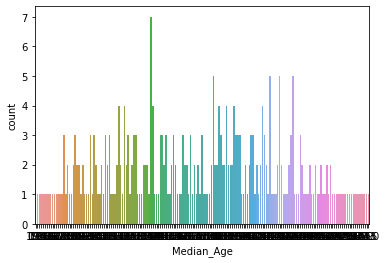

In [22]:
#categorizing data on the basis of the Median Age
import seaborn as sns
sns.countplot(x=df["Median_Age"])

<AxesSubplot:xlabel='Total_Females', ylabel='count'>

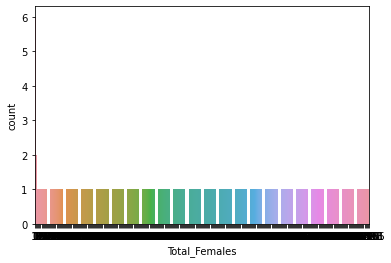

In [23]:
#categorizing data on the basis of the Total Females
sns.countplot(x=df["Total_Females"])

In [24]:
import mysql.connector
from PIL import Image
import io

# Connect to MySQL database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="@1Figosood",
  database="houses"
)

# Create cursor
mycursor = mydb.cursor()

# Execute SQL query to retrieve image from database
mycursor.execute("SELECT images FROM pictures WHERE image_id = %s", (4,))

# Retrieve image data from query result
result = mycursor.fetchone()
images = result[0]

# Convert image data to PIL Image object
image = Image.open(io.BytesIO(images))

# Display image
image.show()

# Close cursor and database connection
mycursor.close()
mydb.close()


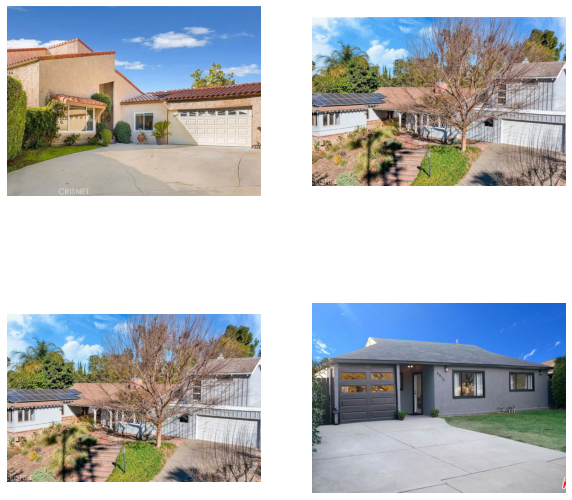

In [25]:
import mysql.connector
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

# Connect to MySQL database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="@1Figosood",
  database="houses"
)

# Create cursor
mycursor = mydb.cursor()

# Execute SQL query to retrieve images from database
mycursor.execute("SELECT images FROM pictures")

# Retrieve image data from query result
results = mycursor.fetchall()
imagess = []

# Loop through query results and append image data to images list
for result in results:
    images = result[0]
    # Convert image data to PIL Image object
    image = Image.open(io.BytesIO(images))
    imagess.append(image)

# Calculate number of rows and columns in image grid
num_rows = int(np.ceil(np.sqrt(len(imagess))))
num_cols = int(np.ceil(len(imagess) / num_rows))

# Create image grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Loop through images and display in image grid
for i in range(len(imagess)):
    row = i // num_cols
    col = i % num_cols
    axs[row,col].imshow(imagess[i])
    axs[row,col].axis('off')

# Display image grid
plt.show()

# Close cursor and database connection
mycursor.close()
mydb.close()


In [31]:
query3 = "SELECT Zip_Code , images FROM census , pictures WHERE image_id = 1  ;"
df_2 = pd.read_sql(query3, connection)


/Users/adityasood/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [32]:
print(df_2)

     Zip_Code                                             images
0       91371  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1       90001  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2       90002  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
3       90003  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
4       90004  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
..        ...                                                ...
314     93552  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
315     93553  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
316     93560  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
317     93563  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
318     93591  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...

[319 rows x 2 columns]
